In [2]:
import numpy as np
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt
from numpy.random import uniform
import pdb

def show_image(title, image):
    # Redimensionează imaginea
    image_resized = cv.resize(image, (0, 0), fx=0.3, fy=0.3)

    # Converteste imaginea din BGR în RGB (formatul folosit de matplotlib)
    image_rgb = cv.cvtColor(image_resized, cv.COLOR_BGR2RGB)

    # Afișează imaginea cu matplotlib
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')  # Ascunde axele pentru a afișa doar imaginea
    plt.show()

In [3]:
def find_color_values_using_trackbar(frame,fx = 0.2, fy = 0.2):

    frame_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    def nothing(x):
        pass

    cv.namedWindow("Trackbar")
    cv.createTrackbar("LH", "Trackbar", 0, 255, nothing)
    cv.createTrackbar("LS", "Trackbar", 0, 255, nothing)
    cv.createTrackbar("LV", "Trackbar", 0, 255, nothing)
    cv.createTrackbar("UH", "Trackbar", 255, 255, nothing)
    cv.createTrackbar("US", "Trackbar", 255, 255, nothing)
    cv.createTrackbar("UV", "Trackbar", 255, 255, nothing)



    while True:

        l_h = cv.getTrackbarPos("LH", "Trackbar")
        l_s = cv.getTrackbarPos("LS", "Trackbar")
        l_v = cv.getTrackbarPos("LV", "Trackbar")
        u_h = cv.getTrackbarPos("UH", "Trackbar")
        u_s = cv.getTrackbarPos("US", "Trackbar")
        u_v = cv.getTrackbarPos("UV", "Trackbar")


        l = np.array([l_h, l_s, l_v])
        u = np.array([u_h, u_s, u_v])
        mask_table_hsv = cv.inRange(frame_hsv, l, u)

        res = cv.bitwise_and(frame, frame, mask=mask_table_hsv)

        mask_table_hsv = cv.resize(mask_table_hsv, (0, 0), fx=fx, fy=fy)
        res = cv.resize(res, (0, 0), fx=fx, fy=fy)

        resized_frame = cv.resize(frame, (0, 0), fx=fx, fy=fy)

        cv.imshow("Frame", resized_frame)
        cv.imshow("Mask", mask_table_hsv)
        cv.imshow("Res", res)

        if cv.waitKey(25) & 0xFF == ord('q'):
                break
    cv.destroyAllWindows()

In [4]:
img = cv.imread("test.jpg")
find_color_values_using_trackbar(img,fx=1, fy=1)

KeyboardInterrupt: 

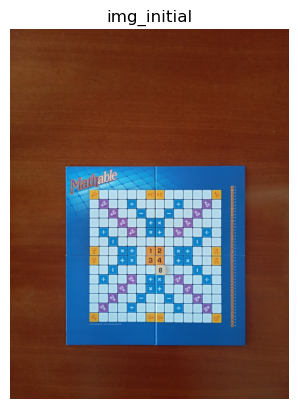

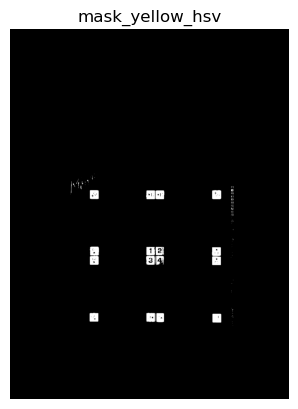

In [8]:
low_yellow = (15, 105, 105)
high_yellow = (90, 255, 255)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
mask_yellow_hsv = cv.inRange(img_hsv, low_yellow, high_yellow)
show_image('img_initial', img)
show_image('mask_yellow_hsv', mask_yellow_hsv)